In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

In [ ]:
# import cv2
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
dir ="./yolo"
if not os.path.isdir(dir):
    os.makedirs(dir)
!mv yolov3.weights ./yolo/yolov3.weights
!mv yolov3.cfg ./yolo/yolov3.cfg
!mv coco.names ./yolo/coco.names

In [ ]:
classes = None
with open(dir+'/'+'coco.names', "r") as f:
 classes = [line.strip() for line in f.readlines()]

In [ ]:
net = cv2.dnn.readNet(dir+'/'+'yolov3.weights',dir+'/'+'yolov3.cfg')
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
data_dir ="./data_processed_new"
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2022-06-08 11:38:29--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2022-06-08 11:38:29 (24.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
import glob
for filename in glob.glob('./data/**/*.jpg', recursive=True):
  image = cv2.imread(filename)
  try:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  except:
    continue
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  path = os.path.dirname(filename)
  path = path.replace("data","data_processed_new")
  if not os.path.isdir(path):
    os.makedirs(path)
  for i ,(x,y,w,h) in enumerate(faces): 
    crop_image = image[y:y+h,x:x+w,:]
    name = path +"/"+str(i)+"_"+os.path.basename(filename) 
    print(name)
    cv2.imwrite(name, crop_image)


./data_processed_new/surprised/0_109.jpg
./data_processed_new/surprised/0_1.jpg
./data_processed_new/surprised/0_2.jpg
./data_processed_new/surprised/0_4.jpg
./data_processed_new/surprised/0_3.jpg
./data_processed_new/surprised/0_5.jpg
./data_processed_new/surprised/0_6.jpg
./data_processed_new/surprised/0_7.jpg
./data_processed_new/surprised/0_8.jpg
./data_processed_new/surprised/0_11.jpg
./data_processed_new/surprised/0_12.jpg
./data_processed_new/surprised/0_13.jpg
./data_processed_new/surprised/0_14.jpg
./data_processed_new/surprised/0_17.jpg
./data_processed_new/surprised/0_18.jpg
./data_processed_new/surprised/0_20.jpg
./data_processed_new/surprised/0_19.jpg
./data_processed_new/surprised/0_21.jpg
./data_processed_new/surprised/0_22.jpg
./data_processed_new/surprised/0_23.jpg
./data_processed_new/surprised/0_27.jpg
./data_processed_new/surprised/0_29.jpg
./data_processed_new/surprised/0_31.jpg
./data_processed_new/surprised/0_32.jpg
./data_processed_new/surprised/0_33.jpg
./data_

In [ ]:
image

In [ ]:
# import glob
# for filename in glob.glob('./data/**/*.jpg', recursive=True):
#   image = cv2.imread(filename)
#   try:
#     net.setInput(cv2.dnn.blobFromImage(image,1 / 255.0, (416,416), (0,0,0), True, crop=False))
#   except:
#     continue
#   outs = net.forward(output_layers)
#   class_ids = []
#   confidences = []
#   boxes = []
#   Width = image.shape[1]
#   Height = image.shape[0]
#   for out in outs:
#       for detection in out:
#           scores = detection[5:]
#           class_id = np.argmax(scores)
#           confidence = scores[class_id]
#           if confidence > 0.1 and class_id == 0:
#               center_x = int(detection[0] * Width)
#               center_y = int(detection[1] * Height)
#               w = int(detection[2] * Width)
#               h = int(detection[3] * Height)
#               x = center_x - w / 2
#               y = center_y - h / 2
#               class_ids.append(class_id)
#               # confidences.append(float(confidence))
#               boxes.append([x, y, x+w, y+h])
#   path = os.path.dirname(filename)
#   path = path.replace("data","data_processed")
#   if not os.path.isdir(path):
#     os.makedirs(path)
#   for i,img in enumerate(boxes):
#     img[0],img[1] =max(0,img[0]),max(0,img[1])
#     crop_image = image[int(img[1]):int(img[3]),int(img[0]):int(img[2]),:]
#     name = path +"/"+str(i)+"_"+os.path.basename(filename) 
#     print(name)
#     cv2.imwrite(name, crop_image)





In [ ]:
filename

'./data/surprised/238.jpg'

In [ ]:
test = cv2.imread("./data_processed/angry/31_152.jpg")

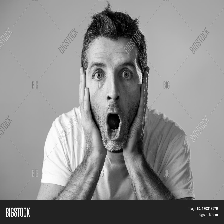

In [ ]:
from google.colab.patches import cv2_imshow
gray = cv2.resize(gray,(224,224))
cv2_imshow(gray)

In [ ]:
# class_ids = []
# confidences = []
# boxes = []
# Width = test.shape[1]
# Height = test.shape[0]
# for out in outs:
#     for detection in out:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.1:
#             center_x = int(detection[0] * Width)
#             center_y = int(detection[1] * Height)
#             w = int(detection[2] * Width)
#             h = int(detection[3] * Height)
#             x = center_x - w / 2
#             y = center_y - h / 2
#             class_ids.append(class_id)
#             confidences.append(float(confidence))
#             boxes.append([x, y, w, h])

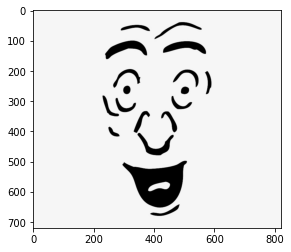

In [ ]:
# indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
# #check if is people detection
# for i in indices:
#     i = i[0]
#     box = boxes[i]
#     if class_ids[i]==0:
#         label = str(classes[class_id]) 
#         cv2.rectangle(test, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
#         cv2.putText(test, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
# plt.imshow(test[:,:,::-1])